In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from concurrent.futures import ProcessPoolExecutor, as_completed

def process_image(image_path):
    """
    Lädt ein Bild, extrahiert den Farbmodus und die eindeutigen Pixelwerte.
    """
    try:
        img = Image.open(image_path)
        mode = img.mode
        arr = np.array(img)
        unique_values = np.unique(arr)
        return mode, unique_values
    except Exception as e:
        print(f"Fehler beim Verarbeiten von {image_path}: {e}")
        return None, np.array([])

def analyze_labels(label_folder, num_workers=8):
    """
    Analysiert die Label-Bilder in einem Ordner:
      - Bestimmt den Farbmodus (z.B. "P", "L", etc.)
      - Ermittelt den Wertebereich der Pixel
      - Erstellt ein Histogramm der Pixelwerte
    
    Die Verarbeitung erfolgt parallel mit ProcessPoolExecutor.
    """
    # Erstelle Liste aller passenden Dateien
    files = [os.path.join(label_folder, f) for f in os.listdir(label_folder)
             if f.lower().endswith(('.png', '.jpg', '.tiff'))]
    
    if not files:
        print("❌ Keine passenden Bilder gefunden!")
        return
    
    mode_set = set()
    all_values = []
    
    # Parallelverarbeitung der Bilder auf der CPU
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        futures = {executor.submit(process_image, file): file for file in files}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Analysiere Label-Bilder"):
            mode, unique_values = future.result()
            if mode is not None:
                mode_set.add(mode)
            all_values.extend(unique_values.tolist())
    
    all_values = np.array(all_values)
    unique_values = np.unique(all_values)
    min_value, max_value = unique_values.min(), unique_values.max()
    
    print(f"📊 Farbmodus der Bilder: {mode_set}")
    print(f"🔍 Wertebereich: {min_value} - {max_value}")
    print(f"📌 Einzigartige Werte im Datensatz: {unique_values}")
    
    # Erstelle ein Histogramm der Pixelwerte
    plt.figure(figsize=(10, 5))
    plt.hist(all_values, bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.xlabel("Pixel-Werte")
    plt.ylabel("Häufigkeit")
    plt.title("Histogramm der Pixel-Werte in den Annotationen")
    plt.show()



# Validation Big Class Dataset

Analysiere Label-Bilder:   0%|          | 0/18000 [00:00<?, ?it/s]

📊 Farbmodus der Bilder: {'P'}
🔍 Wertebereich: 0 - 123
📌 Einzigartige Werte im Datensatz: [  0   1   3   4   5   6   7  11  12  13  14  15  16  19  21  22  24  25
  27  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  59  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 116 117 118 120 123]


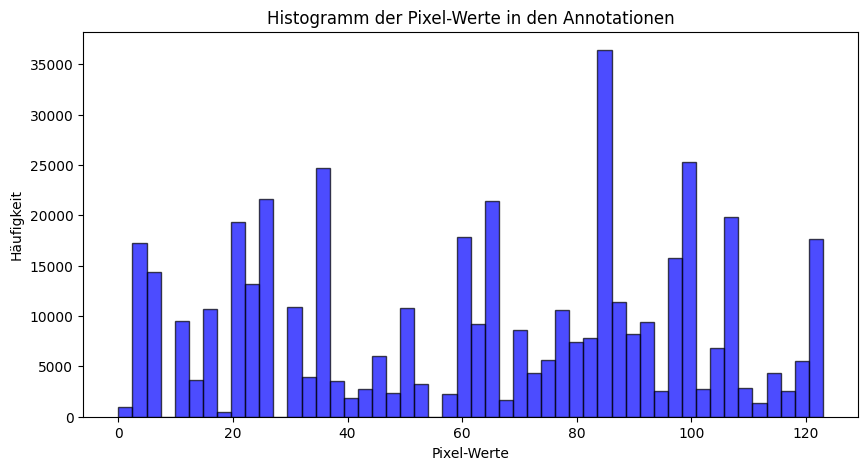

In [2]:
# Starte die Analyse (Passe den Ordnerpfad nach Bedarf an)
label_folder = "Mapillary_Vistas/training/v2.0/labels_big"
analyze_labels(label_folder, num_workers=8)

Analysiere Label-Bilder:   0%|          | 0/2000 [00:00<?, ?it/s]

📊 Farbmodus der Bilder: {'P'}
🔍 Wertebereich: 0 - 123
📌 Einzigartige Werte im Datensatz: [  0   1   3   4   5   6   7  11  12  13  14  15  16  19  21  22  24  25
  27  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  59  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 116 117 118 120 123]


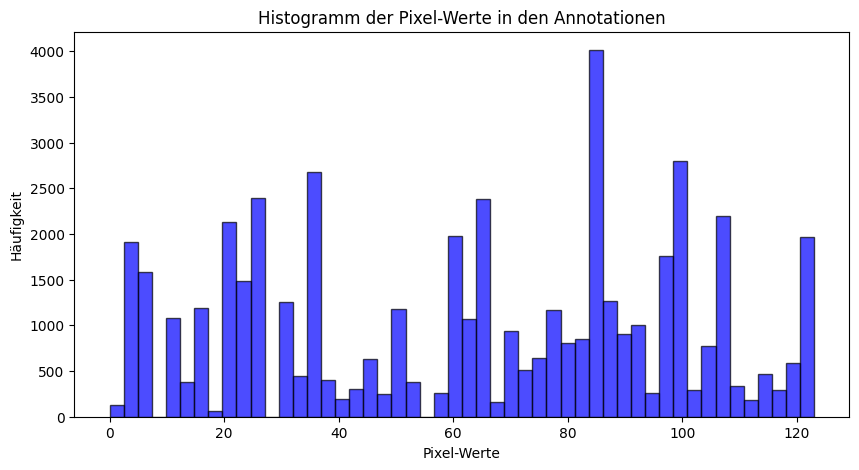

In [3]:
# Starte die Analyse (Passe den Ordnerpfad nach Bedarf an)
label_folder = "Mapillary_Vistas/validation/v2.0/labels_big"
analyze_labels(label_folder, num_workers=8)

# Validation Small Class Dataset

Analysiere Label-Bilder:   0%|          | 0/18000 [00:00<?, ?it/s]

📊 Farbmodus der Bilder: {'P'}
🔍 Wertebereich: 3 - 123
📌 Einzigartige Werte im Datensatz: [  3   4   5   6   7  11  12  13  14  15  16  19  21  22  24  25  27  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  61  64  84  85  86  90  91  92  93  94  95  99
 100 102 103 105 107 108 110 111 112 114 116 123]


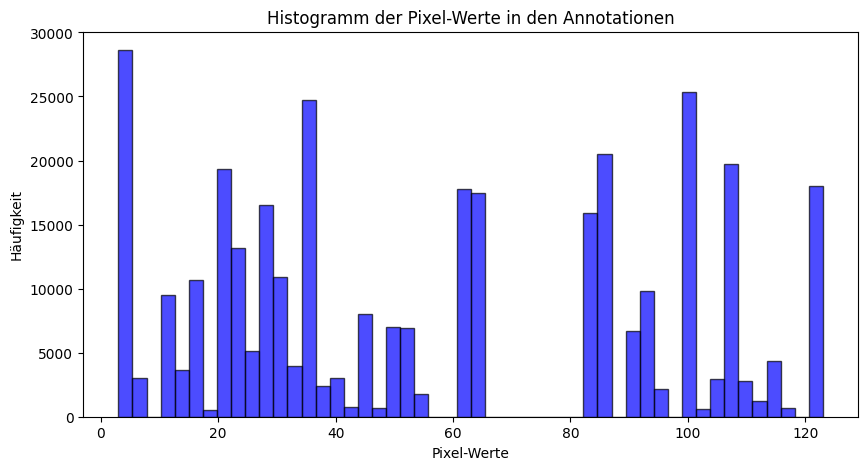

In [4]:
# Starte die Analyse (Passe den Ordnerpfad nach Bedarf an)
label_folder = "Mapillary_Vistas/training/v2.0/labels_small"
analyze_labels(label_folder, num_workers=8)

Analysiere Label-Bilder:   0%|          | 0/2000 [00:00<?, ?it/s]

📊 Farbmodus der Bilder: {'P'}
🔍 Wertebereich: 3 - 123
📌 Einzigartige Werte im Datensatz: [  3   4   5   6   7  11  12  13  14  15  16  19  21  22  24  25  27  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  61  64  84  85  86  90  91  92  93  94  95  99
 100 102 103 105 107 108 110 111 112 114 116 123]


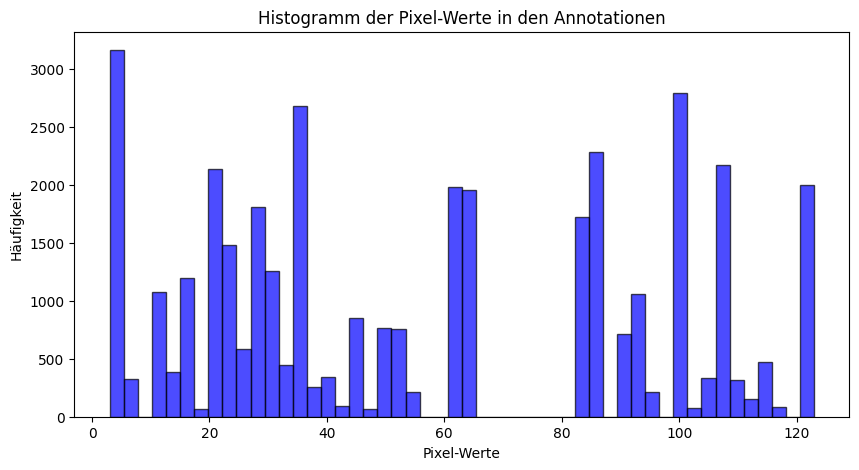

In [5]:
# Starte die Analyse (Passe den Ordnerpfad nach Bedarf an)
label_folder = "Mapillary_Vistas/validation/v2.0/labels_small"
analyze_labels(label_folder, num_workers=8)